# Assignment 1 -- Yimeng LU -- yimeng.lu@kaust.edu.sa -- Julia 0.6.0

## Problem 1
Write function B = ER(n, p). 

In [1]:
function ER(n, p)
    B = zeros(n,n)
    for i=1:n
        for j=1:i-1
            if rand()<p
                B[i,j] = 1
                B[j,i] = 1
            end
        end
    end
    return B
end

ER (generic function with 1 method)

## Problem 2
Union of two adjacency matrices. 

In [2]:
function Union(B1, B2)
    B = B1 + B2; 
    B[B.>0]=1
    return B
end

Union (generic function with 1 method)

## Problem 3
Adjacency matrix of cycle graph

In [3]:
function Cycle(n)
    dv = zeros(n)
    ev = ones(n-1)
    C =zeros(n,n)
    for i=1:n-1
        for j=i+1
            C[i,j]=1
        end
    end
    C[1,n]=1
    for i=1:n
        for j=1:i
            C[i,j] = C[j,i]
        end
    end
    return C
end

Cycle (generic function with 1 method)

## Problem 4
Write function AfromB(B) to represent constraints $x^i=x^j$ whenever $B[i,j]==1$ 

In [4]:
function AfromB(B)
    size_E = convert(Int64, size(B[B.>0], 1)/2)
    n = size(B,2)
    A = zeros(size_E, n)
    edge_counter = 0
    for i=1:n
        for j=1:i-1
            if B[i,j] > 0.1
                edge_counter = edge_counter + 1
                A[edge_counter,i]=1
                A[edge_counter,j]=-1
            end
        end
    end
    return A
end

AfromB (generic function with 1 method)

## Problem 5

### Problem 5.a
Write functin rate(A) to indicate the rate of the randomized Kaczmarz method for $\mathbf{A}x=b$

In [5]:
function rate(A)
    # λ_min(A'*A)
    eigvals_ATA = sort(eigvals(A'*A), rev=true)
    λ_min=0
    for i=size(eigvals_ATA,1):-1:1
        if i==1 || eigvals_ATA[i]>0.0001
            λ_min = eigvals_ATA[i]
            break
        end
    end
    # ||A||_F^2, either of these two methods work
    Frob_A = vecnorm(A,2) # need to be squared before pulging in to ρ's expression
    Frob_A2 = sum(eigvals_ATA)
    # Final compute
    ρ = 1 - λ_min/Frob_A2
    return ρ
end

rate (generic function with 1 method)

### Problem 5.b
Do experiments with RK methods. From theoretical analysis in part c, we conclude that $\frac{1}{1-\rho}$ represents
$$\frac{2\vert E \vert}{connectivity}$$
for given n. Thus we will design an experiment whose connectivity is different from c, where graph is connected. We'll do this by constrcting two smaller matrices using $G(n/2,2p) \cap C(n/2)$ and combine them diagnaly. Then add only one edges to connect them together. Thus they'll have same edge numbers but different connectivity. 

In [58]:
# Bridged graph

n = 100
halfn = 50
_ps=Float64[]
for i=1:100
    p=i/100
    B1 = Union(ER(halfn,2*p), Cycle(halfn))
    B4 = Union(ER(halfn,2*p), Cycle(halfn))
    B3 = zeros(halfn, halfn)
    B3[halfn,1] = 1
    B2 = B3'
    #B3[halfn,1]=1
    #B2[1,halfn]=1
    _B = [B1 B2;B3 B4];
    _A = AfromB(_B)
    ρ=rate(_A)
    push!(_ps, 1/(1-ρ))
end

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] round(::Type{Int64}, ::BitArray{2}) at ./deprecated.jl:57
 [3] ER(::Int64, ::Float64) at ./In[1]:2
 [4] macro expansion at ./In[58]:8 [inlined]
 [5] anonymous at ./<missing>:?
 [6] include_string(::String, ::String) at ./loading.jl:515
 [7] include_string(::Module, ::String, ::String) at /opt/julia_packages/.julia/v0.6/Compat/src/Compat.jl:464
 [8] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /opt/julia_packages/.julia/v0.6/IJulia/src/execute_request.jl:154
 [9] eventloop(::ZMQ.Socket) at /opt/julia_packages/.julia/v0.6/IJulia/src/eventloop.jl:8
 [10] (::IJulia.##14#17)() at ./task.jl:335
while loading In[58], in expression starting on line 6


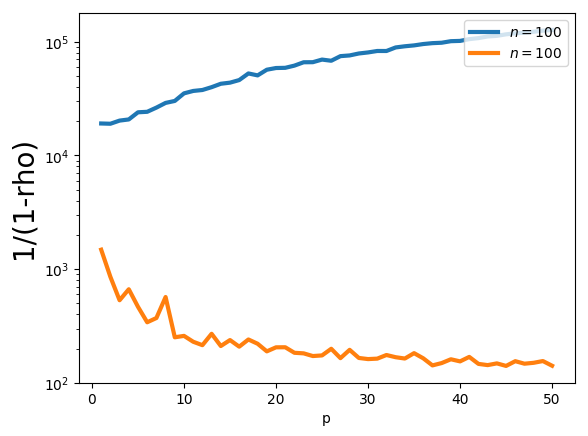

PyObject <function show at 0x7f92808dbb90>

In [59]:
indices=linspace(1,length(_ps[1:halfn]),length(_ps[1:halfn]))
PlotRhos(indices, _ps[1:halfn])
PlotRhos(indices, ps[1:halfn])

From this experiment we can see this quantity indeed describes connectivity. And also indicates the rate of convergence. 

### Problem 5.c

In [8]:
N=100
ps=Float64[]
for i=1:100
    p=i/100
    A = AfromB(Union(ER(N,p), Cycle(N)))
    ρ=rate(A)
    push!(ps, 1/(1-ρ))
    println(1/(1-ρ))
end

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] round(::Type{Int64}, ::BitArray{2}) at ./deprecated.jl:57
 [3] ER(::Int64, ::Float64) at ./In[1]:2
 [4] macro expansion at ./In[8]:5 [inlined]
 [5] anonymous at ./<missing>:?
 [6] include_string(::String, ::String) at ./loading.jl:515
 [7] include_string(::Module, ::String, ::String) at /opt/julia_packages/.julia/v0.6/Compat/src/Compat.jl:464
 [8] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /opt/julia_packages/.julia/v0.6/IJulia/src/execute_request.jl:154
 [9] eventloop(::ZMQ.Socket) at /opt/julia_packages/.julia/v0.6/IJulia/src/eventloop.jl:8
 [10] (::IJulia.##14#17)() at ./task.jl:335
while loading In[8], in expression starting on line 3


1482.5291018497223
855.1536155196628
532.2610241466649
664.880238658173
465.9835867623064
340.55620345858574
371.1840987631274
568.2214625937194
251.18981643266667
258.44552106319327
229.51501160398612
214.097648838585
269.5941739381658
210.47534186604736
237.47459633244367
207.688723605672
240.25966665193087
220.3802980190278
188.88678562109263
204.9601848859154
205.23261477822328
183.48684508199167
181.39249827968501
171.76991484748012
173.944706837191
198.9903969581518
164.61522046228043
194.74412323916533
165.24357400518684
161.4872885173158
162.95731940771083
175.41394669102723
167.7368577528748
163.2813434234833
182.1619456608811
164.05331211404737
142.10467664007822
148.9607946339479
160.89244781941696
154.17203727119028
168.80501889586816
146.4958614323461
142.9473020365325
148.03109701694476
140.6074630055547
154.79480739976304
147.08033279804326
149.80725176488272
155.1812040460003
141.1356042760364
134.77594646077642
150.4673814305836
132.8794070705922
135.01408463620083
131

In [49]:
using PyPlot
function PlotRhos(xs, fv)
    
    ax = axes()
    plt[:plot](xs, fv, "-", linewidth=3.0, label=L"n=100")
    legend(loc="upper right")
    ylabel("1/(1-rho)", fontsize=20)
    xlabel("p")
    ax[:set_yscale]("log")
    plt[:show]
    
end

PlotRhos (generic function with 1 method)

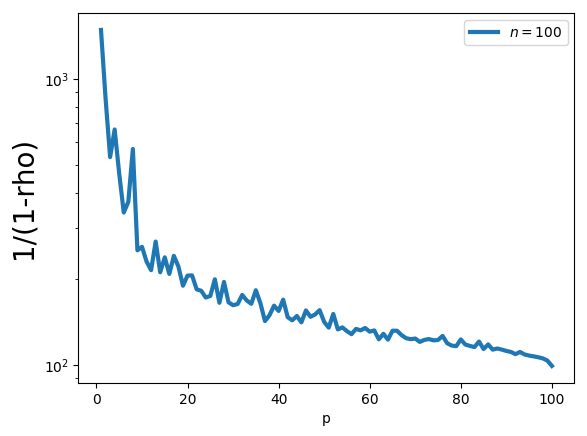

PyObject <function show at 0x7f92808dbb90>

In [10]:
indices=linspace(1,length(ps),length(ps))
PlotRhos(indices, ps)

By trying on different circumstances: 
- N=100 or 200, p goes from 0 to 1 by stepsize 1/100 or 1/200

In any case, the very last $\frac{1}{1-\rho}$ has a value that is pretty near to N-1. In this case($p=1$), $\mathbf{B}$ is $G(n,1)$, $\mathbf{A}$ is describing a graph that each pair of vertices has an edge between them.

We can see $$\frac{1}{1-\rho} = \frac{\Vert A \Vert_F^2}{\lambda_{\min}^+(A^TA)}$$
And as reviewing the way we generate matrix $\mathbf{A}$, we can see that $\mathbf{A^TA} = -\mathbf{B} + diag(\mathbf{B}*\mathbb{1})$, or we can say it's the degree matrix $\mathbf{D}$ minus adjacency matrix $\mathbf{A_{adj}}$, i.e., the Laplacian matrix. For our special setup(the graph represented by $\mathbf{B}$ is connected), $\lambda_{\min}^+(A^TA)$ is the second smallest eigenvalue of $A^TA$(smallest eigenvalue is always 0 associated with eigenvector $\mathbb{1}$). It represents the algebraic connectivity(or Fiedler value) of the graph, which is used in spectral graph partitioning. $\lambda_{\min}^+(A^TA)$ is a lower bound of $$\frac{\vert E(G) \cap (U\times W )\vert}{\vert U \vert \vert W \vert}*n$$
where n is the number of nodes in graph G, E is edge set, U and W are disjoint partitions of vertice set V. So this quantity is indicating the conectivity of the graph when we have a fixed n. 

As $\Vert A \Vert_F^2 = 2\vert E \vert$, $\frac{1}{1-\rho}$ is $$\frac{2\vert E \vert}{Lower Bound Of Connectivity}$$

As a special case, when $p=1$ which means it's a complete graph $$\frac{\vert E(G) \cap (U\times W )\vert}{\vert U \vert \vert W \vert}=1$$ and in this case $\mathbb{E}\{\vert E \vert\} = \frac{p}{2}n(n-1)$. Combining these together we get $n-1$, which is shown by the experiments. 


## Problem 6

### Problem 6.a
n = 100, c=(1,2,3,...,100). Find fastest $\mathbf{A}$ for computing the average of $c_i$ via RK for accuracy $\Vert x-c\Vert \leq 10^{-2}$

In [8]:
n=100
m=100
## 68.6s
# B=Cycle(100)
# A=AfromB(B)

c = 1:n
b = zeros(n)
x_star = ones(n)*sum(c)/n;

In [6]:
using StatsBase
    function Kac_sampling(w) # for non-uniform sampling, looks into the function "sample" in the package c
         
        w=w./sum(w)
        return sample(Weights(w))

    end

Kac_sampling (generic function with 1 method)

In [7]:
function RandomKaczmarzSolveWithAccuracy(x, A, b, T, skip, x_star)
    
    (m,n) = size(A)
    norms_A=zeros(size(A)[1])
    #preprocessing
    for i=1:size(A)[1]
        norms_A[i] = norm(A[i,:]) 
    end
    
    w=zeros(size(A)[1])
    for i=1:size(A)[1]
        w[i]=norms_A[i] 
    end 
    
    tic()
    time = 0
    t_terminate = 0
    for t=0:T
        tic()
        coord=Kac_sampling(w)
        x = x - A[coord,:].*(A[coord,:]'*x - b[coord])/(A[coord,:]'*A[coord,:]) 
        time = time + toq()
        if sqrt((x-x_star)'*(x-x_star))[1] < 0.01
            t_terminate = t
            # println("Satisfy criterion at %d iteration", t_terminate)
            break
        end
    end
        
    println("Time = ", time, ", t_terminate = ", t_terminate)
    return time, t_terminate
    
end

RandomKaczmarzSolveWithAccuracy (generic function with 1 method)

In [11]:
using PyPlot

function PlotResults(B, x_star, xs, fv)
    
    ax = axes()
    plt[:plot](skip*(0:length(fv)-1), fv, "-", linewidth=3.0, label=L"||Ax - b||")
    plt[:plot](skip*(0:length(fv)-1), [sqrt((xs[:,i]-x_star)'*B*(xs[:,i]-x_star)) for i=1:length(fv)] , ":", linewidth=3.0, label=L"||x - x^*||_B")
    legend(loc="upper right")
    ylabel("error", fontsize=20)
    xlabel("iterations")
    ax[:set_yscale]("log")
    plt[:show]
    
end

PlotResults (generic function with 1 method)

In [12]:
x = c # initial iterate


Binv = eye(n) # matrix B is one of the 2 parameters of the method

T = 1000*m       # no of iterations 
skip = round(T/30)    # we shall remember x each "skip" number of iterations

# Now we solve the problem
# xs, fv, t_terminate = RandomKaczmarzSolve(x, A, b, T, skip, x_star)

# Let us now plot the results

# PlotResults(eye(n), x_star, xs[:,1:round(Int,t_terminate/skip+1)], fv[1:round(Int,t_terminate/skip+1)])

33333.0

In [45]:
ps=Float64[]
Times=Float64[]

Binv = eye(n) # matrix B is one of the 2 parameters of the method

B=Cycle(100)
A=AfromB(B)
for i=1:101
    p=(i-1)/100
    A = AfromB(Union(ER(n,p), Cycle(n)))
    m=size(A,1)
    T = 10000*m  
    c = 1:n
    b = zeros(m)
    x_star = ones(n)*sum(c)/n
    ρ=rate(A)
    push!(ps, 1/(1-ρ))
    
    x = c # initial iterate
    println("p is ", p, ", rate is ", ρ)

    # Now we solve the problem
    time, t_terminate = RandomKaczmarzSolveWithAccuracy(x, A, b, T, skip, x_star)
    push!(Times, time)
end

p is 0.0, rate is 0.9999802672842827
Time = 2.5223693550000332, t_terminate = 508710
p is 0.01, rate is 0.9991162490780063
Time = 0.08764853000000021, t_terminate = 10204
p is 0.02, rate is 0.9984746716355186
Time = 0.05223721700000002, t_terminate = 6805
p is 0.03, rate is 0.9981536532811618
Time = 0.038472014000000096, t_terminate = 4680
p is 0.04, rate is 0.9978068739790036
Time = 0.03646193399999994, t_terminate = 4309
p is 0.05, rate is 0.9976307877036051
Time = 0.06753228600000018, t_terminate = 4088
p is 0.06, rate is 0.9972260124632784
Time = 0.17944401899999982, t_terminate = 3221
p is 0.07, rate is 0.9973236241069896
Time = 0.04333571800000013, t_terminate = 2901
p is 0.08, rate is 0.9967601703485616
Time = 0.024478220999999967, t_terminate = 2863
p is 0.09, rate is 0.9959800327396683
Time = 0.021053363000000026, t_terminate = 2343
p is 0.1, rate is 0.9962276040984566
Time = 0.07761567099999997, t_terminate = 2654
p is 0.11, rate is 0.9961773909654705
Time = 0.046457334000000

Time = 0.11267427799999993, t_terminate = 1990
p is 0.98, rate is 0.9904865999240601
Time = 0.06181629999999994, t_terminate = 1910
p is 0.99, rate is 0.9904318564447405
Time = 0.05927805700000002, t_terminate = 1911
p is 1.0, rate is 0.98989898989899
Time = 0.10202066900000002, t_terminate = 2036


In [13]:
using PyPlot
function PlotTimes(xs, fv)
    
    ax = axes()
    plt[:plot](xs, fv, "-", linewidth=3.0, label=L"n=100")
    legend(loc="upper right")
    ylabel("Time", fontsize=20)
    xlabel("p")
    ax[:set_yscale]("log")
    plt[:show]
    
end

PlotTimes (generic function with 1 method)

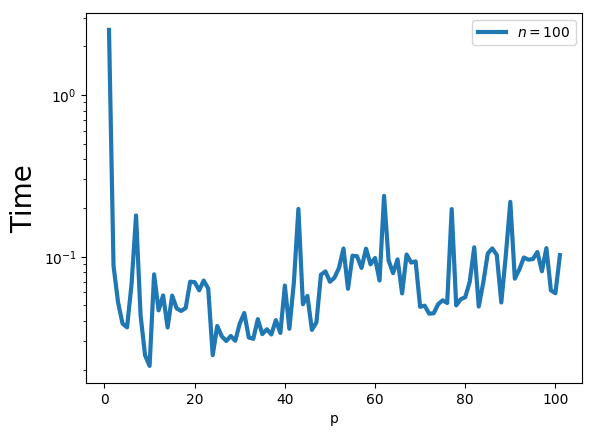

PyObject <function show at 0x7f18d2717b90>

In [46]:
indices=linspace(1,length(Times),length(Times))
PlotTimes(indices, Times)

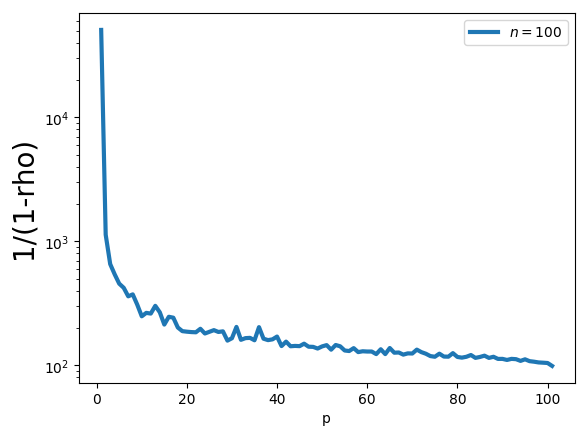

PyObject <function show at 0x7f18d2717b90>

In [50]:
indices=linspace(1,length(ps),length(ps))
PlotRhos(indices, ps)

Firstly sampling method is optimized to reduce duplicated computations. 
Based on both $\rho$ and running time analysis, conclusion is complete graph has the fastest convergence rate. 
Based on previous analysis we can compute something for complete graph(p=1) and the graph only contains a cycle(p=0). 
As $\Vert A \Vert_F^2 = 2\vert E \vert$, $\frac{1}{1-\rho}$ is $$\frac{2\vert E \vert}{Lower Bound Of Connectivity}$$

As a special case, when $p=1$ which means it's a complete graph $$\frac{\vert E(G) \cap (U\times W )\vert}{\vert U \vert \vert W \vert}=1$$
and $\vert E \vert=\mathbf{C}_n^2=O(n^2)$ so in total it's $O(n^2)$
But for cycle case, $$\frac{\vert E(G) \cap (U\times W )\vert}{\vert U \vert \vert W \vert}=\frac{2}{(n/2)^2}$$
and $\vert E \vert=n$ so in total it's $O(n^3)$, that's why it's slower. 

### Problem 6.b
Consider one special $\mathbf{A}$ which is a chain(one edge less than a cycle). In theoretical analysis above, it has $$\frac{2\vert E \vert}{Lower Bound Of Connectivity} = \frac{2*(n-1)}{\frac{1}{((n-1)/2)^2}}$$
which should be a little bit slower than p=0 case in a part because it's bigger in terms of this quantity. 

In [51]:
function Chain(n)
    dv = zeros(n)
    ev = ones(n-1)
    C =zeros(n,n)
    for i=1:n-1
        for j=i+1
            C[i,j]=1
        end
    end
    #C[1,n]=1
    for i=1:n
        for j=1:i
            C[i,j] = C[j,i]
        end
    end
    return C
end

Chain (generic function with 1 method)

In [54]:
A = Chain(n)
m=size(A,1)
T = 10000*m  
c = 1:n
b = zeros(m)
x_star = ones(n)*sum(c)/n
ρ=rate(A)

x = c # initial iterate

# Now we solve the problem
time_c, t_terminate_c = RandomKaczmarzSolveWithAccuracy(x, A, b, T, skip, x_star)

Time = 6.748147175, t_terminate = 0


(6.748147175, 0)

Also, bridged graph can be tested here. We assume p = 1 in this case. The parameter $$\frac{2\vert E \vert}{Lower Bound Of Connectivity} = \frac{(1/2)*(n/2-1)*(n/2)}{\frac{1}{((n-1)/2)^2}}=O(n^4)$$ so it's expected to be very slow.  

In [71]:
function Bridge(n, halfn)
    p=1
    B1 = Union(ER(halfn,p), Cycle(halfn))
    B4 = Union(ER(halfn,p), Cycle(halfn))
    B3 = zeros(halfn, halfn)
    B3[halfn,1] = 1
    B2 = B3'
    #B3[halfn,1]=1
    #B2[1,halfn]=1
    _B = [B1 B2;B3 B4];
    _A = AfromB(_B)
    return _A
end

Bridge (generic function with 1 method)

In [72]:
n=100
halfn=50
A = Bridge(n,halfn)
m=size(A,1)
T = 10000*m  
c = 1:n
b = zeros(m)
x_star = ones(n)*sum(c)/n
ρ=rate(A)

x = c # initial iterate

# Now we solve the problem
time_c, t_terminate_c = RandomKaczmarzSolveWithAccuracy(x, A, b, T, skip, x_star)

Time = 18.74524521800026, t_terminate = 1204722


(18.74524521800026, 1204722)

## Problem 7

In [73]:
function RandomKaczmarzSolveWithAccuracyMinibatch(x, A, b, T, skip, x_star, tau)
    
    (m,n) = size(A)
    norms_A=zeros(size(A)[1])
    #preprocessing
    for i=1:size(A)[1]
        norms_A[i] = norm(A[i,:]) 
    end
    
    w=zeros(size(A)[1])
    for i=1:size(A)[1]
        w[i]=norms_A[i] 
    end 
    xx = zeros(tau)
    tic()
    time = 0
    t_terminate = 0
    for t=0:T
        tic()
        x = @parallel (+) for i=1:tau
            coord=Kac_sampling(w)
            x - A[coord,:].*(A[coord,:]'*x - b[coord])/(A[coord,:]'*A[coord,:]) 
        end
        x = x/tau
        time = time + toq()
        if sqrt((x-x_star)'*(x-x_star))[1] < 0.01
            t_terminate = t
            # println("Satisfy criterion at %d iteration", t_terminate)
            break
        end
    end
        
    println("Time = ", time, ", t_terminate = ", t_terminate)
    return time, t_terminate
    
end

RandomKaczmarzSolveWithAccuracyMinibatch (generic function with 1 method)

### Exp 1: Try on different $\tau$
Let it changes from 1 to 100

In [75]:
Times=Float64[]

Binv = eye(n) # matrix B is one of the 2 parameters of the method
n=100
B=Cycle(100)
A=AfromB(B)
p=1
for tau=1:100
    A = AfromB(Union(ER(n,p), Cycle(n)))
    m=size(A,1)
    T = 10000*m  
    c = 1:n
    b = zeros(m)
    x_star = ones(n)*sum(c)/n
    
    x = c # initial iterate
    println("tau is ", tau)

    # Now we solve the problem
    time, t_terminate = RandomKaczmarzSolveWithAccuracyMinibatch(x, A, b, T, skip, x_star, tau)
    push!(Times, time)
end

tau is 1
Time = 0.18503935999999965, t_terminate = 1926
tau is 2
Time = 0.22227799699999984, t_terminate = 1388
tau is 3
Time = 0.2589378639999998, t_terminate = 1197
tau is 4
Time = 0.33233608299999945, t_terminate = 1179
tau is 5
Time = 0.3918728350000003, t_terminate = 1126
tau is 6
Time = 0.5509486870000002, t_terminate = 1123
tau is 7
Time = 0.4884557859999997, t_terminate = 1087
tau is 8
Time = 0.5506271790000008, t_terminate = 1086
tau is 9
Time = 0.6016141399999991, t_terminate = 1073
tau is 10
Time = 0.6461554619999997, t_terminate = 1032
tau is 11
Time = 0.7029609729999998, t_terminate = 1042
tau is 12
Time = 0.8053904339999998, t_terminate = 1047
tau is 13
Time = 0.904419992999999, t_terminate = 1078
tau is 14
Time = 0.9479822749999994, t_terminate = 1042
tau is 15
Time = 1.01789079, t_terminate = 1057
tau is 16
Time = 1.0370760169999997, t_terminate = 1042
tau is 17
Time = 1.223870031, t_terminate = 1050
tau is 18
Time = 1.158810955999999, t_terminate = 1033
tau is 19
Time 

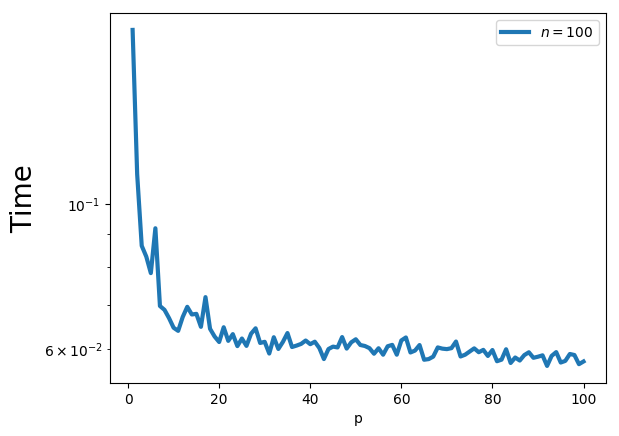

PyObject <function show at 0x7f18d2717b90>

In [77]:
for tau = 1:100
    Times[tau]=Times[tau]/tau
end
indices=linspace(1,length(Times),length(Times))
PlotTimes(indices, Times)

From the graph we can see average running time is decreasing with parallelism parameter $\tau$ and it reaches a steady small value when $\tau$ is about 40. That means this algorithm can't be accelerated unlimitedly and will reach some limit rather because of the computational limit or the problem formulation itself. 

### Exp 2: Study convergence rate for best stepsize with different tau
First generate A matrix with pre-computed $\lambda_{min}^+$ and $\lambda_{max}$. 

In [9]:
n=100
A = AfromB(Union(ER(n,1), Cycle(n)))
m=size(A,1)
T = 1000*m  
c = 1:n
b = zeros(m)
x_star = ones(n)*sum(c)/n

x = c # initial iterate

eigvals_ATA = sort(eigvals(A'*A), rev=true)
λ_min=0
for i=size(eigvals_ATA,1):-1:1
    if i==1 || eigvals_ATA[i]>0.0001
        λ_min = eigvals_ATA[i]
        break
    end
end
λ_max = eigvals_ATA[1]

100.00000000000018

In [10]:
function RandomKaczmarzSolveWithAccuracyMinibatchWithStepSize(x, A, b, T, skip, x_star, tau, omega)
    
    (m,n) = size(A)
    norms_A=zeros(size(A)[1])
    #preprocessing
    for i=1:size(A)[1]
        norms_A[i] = norm(A[i,:]) 
    end
    
    w=zeros(size(A)[1])
    for i=1:size(A)[1]
        w[i]=norms_A[i] 
    end 
    tic()
    time = 0
    t_terminate = 0
    for t=0:T
        tic()
        x = @parallel (+) for i=1:tau
            coord=Kac_sampling(w)
            x - omega*(A[coord,:].*(A[coord,:]'*x - b[coord])/(A[coord,:]'*A[coord,:]))
        end
        x = x/tau
        time = time + toq()
        if sqrt((x-x_star)'*(x-x_star))[1] < 0.01
            t_terminate = t
            # println("Satisfy criterion at %d iteration", t_terminate)
            break
        end
    end
        
    println("Time = ", time, ", t_terminate = ", t_terminate)
    return time, t_terminate
    
end

RandomKaczmarzSolveWithAccuracyMinibatchWithStepSize (generic function with 1 method)

In [11]:
ρ=rate(A)
c = 1:n
b = zeros(m)
x_star = ones(n)*sum(c)/n
x = c # initial iterate
Times=Float64[]
ConvergenceFactor=Float64[]
for tau=1:10
    # Now we solve the problem
    w = 1/(1/tau+(1-1/tau)*λ_max)
    cf = 1-λ_min/(1/w)
    time, t_terminate = RandomKaczmarzSolveWithAccuracyMinibatchWithStepSize(x, A, b, T, skip, x_star, tau, w)
    push!(Times, time)
    push!(ConvergenceFactor, cf)
end

Time = 0.8856661199999983, t_terminate = 2005
Time = 7.5547228620000055, t_terminate = 51456
Time = 13.921971941000109, t_terminate = 68264
Time = 20.126208636999955, t_terminate = 76586
Time = 26.685201782999858, t_terminate = 81511
Time = 32.34139832400006, t_terminate = 85054
Time = 38.16529512400034, t_terminate = 87345


LoadError: [91m[91mInterruptException:[39m
Array{Float64,N} where N(::Tuple{Int64}) at ./boot.jl:317
broadcast_t(::Function, ::Type{T} where T, ::Tuple{Base.OneTo{Int64}}, ::CartesianRange{CartesianIndex{1}}, ::Array{Float64,1}, ::Float64) at ./broadcast.jl:266
broadcast_c at ./broadcast.jl:314 [inlined]
broadcast(::Function, ::Array{Float64,1}, ::Float64) at ./broadcast.jl:434
(::##5#6{Array{Float64,2},Array{Float64,1},Float64})(::Base.#+, ::UnitRange{Int64}, ::Int64, ::Int64) at ./distributed/macros.jl:162
(::Base.Distributed.##135#136{##5#6{Array{Float64,2},Array{Float64,1},Float64},Tuple{Base.#+,UnitRange{Int64},Int64,Int64},Array{Any,1}})() at ./distributed/remotecall.jl:314
run_work_thunk(::Base.Distributed.##135#136{##5#6{Array{Float64,2},Array{Float64,1},Float64},Tuple{Base.#+,UnitRange{Int64},Int64,Int64},Array{Any,1}}, ::Bool) at ./distributed/process_messages.jl:56
#remotecall_fetch#140(::Array{Any,1}, ::Function, ::Function, ::Base.Distributed.LocalProcess, ::Function, ::Vararg{Any,N} where N) at ./distributed/remotecall.jl:339
remotecall_fetch(::Function, ::Base.Distributed.LocalProcess, ::Function, ::Vararg{Any,N} where N) at ./distributed/remotecall.jl:339
#remotecall_fetch#144(::Array{Any,1}, ::Function, ::Function, ::Int64, ::Function, ::Vararg{Any,N} where N) at ./distributed/remotecall.jl:367
remotecall_fetch(::Function, ::Int64, ::Function, ::Vararg{Any,N} where N) at ./distributed/remotecall.jl:367
(::Base.Distributed.##155#156{Base.#+,##5#6{Array{Float64,2},Array{Float64,1},Float64},UnitRange{Int64},Array{UnitRange{Int64},1}})() at ./distributed/macros.jl:144[39m

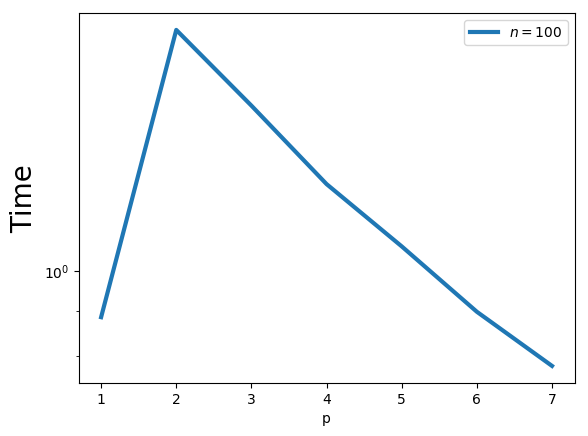

PyObject <function show at 0x7f6e57bd7b90>

In [14]:
for tau = 1:7
    Times[tau]=Times[tau]/tau
end
indices=linspace(1,length(Times[1:7]),length(Times[1:7]))
PlotTimes(indices, Times[1:7])

We can see that average time/rate of convergence under the best stepsize of $\tau$ first increase and then decrease as $\tau$ increases because they're computed differently for $\tau=1$ and $\tau$ is bigger. 

### Exp 3: Study convergence for optimal stepsize and stepsize=1